In [1]:
import os
import matplotlib.pyplot as plt

from pathlib import Path

from bmoca.environment.environment import BMocaEnv
from bmoca.environment.wrapper import GPTActionParsingWrapper

from bmoca.agent.foundation_model.utils import parse_obs

Warning! No module named 'sounddevice'


2024-11-09 13:33:00.318348: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-09 13:33:00.328507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731126780.340654 3958727 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731126780.344104 3958727 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-09 13:33:00.357683: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Warning! No module named 'keras.layers.convolutional'


In [2]:
_HOME_PATH = Path.home()
_WORK_PATH = os.environ["BMOCA_HOME"]
_TASK_PATH = f"{_WORK_PATH}/asset/tasks"

# Initialize Env 109 (Tablet)

In [3]:
avd_id = 90
task_name = "clock/create_alarm_at_10:30_am"

In [ ]:
# instantiate environment
env = BMocaEnv(
        task_path=f"{_TASK_PATH}/{task_name}.textproto",
        avd_name=f"WXGA_Tablet_test_{avd_id:02d}",
        state_type="text",
        action_tanh=False,
        adjusting_freq=1/5,
        run_headless=True,
)

In [5]:
# wrap with GPTActionParsing for easy interpretation
env = GPTActionParsingWrapper(env)

In [6]:
# reset
timestep = env.reset()

ERROR:absl:`stop_stream()` called before `get_stream_output()`. This violates the `LogStream` API.


Thu Dec 31 13:30:00 KST 2015
Driver successfully created


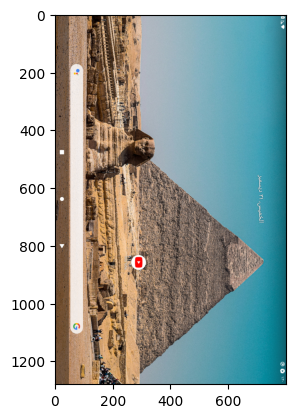

In [7]:
# render image obs
img_obs = timestep.curr_obs['pixel']
plt.imshow(timestep.curr_obs['pixel'])
plt.show()

In [8]:
# parse text obs
raw_obs = timestep.curr_obs['text']
timestep.curr_obs['text'], parsed_obs, parsed_bbox = parse_obs(
    raw_obs,
    env._coordinator._screen_size,
    skip_non_leaf=False,
    attribute_check=False,
)
print(parsed_obs)

[{'numeric_tag': 0, 'resource_id': '', 'class': 'View', 'description': 'قائمةالتطبيقات'}, {'numeric_tag': 1, 'resource_id': 'id_scrim_view', 'class': 'View', 'description': ''}, {'numeric_tag': 2, 'resource_id': 'id_clock', 'class': 'TextView', 'description': 'الخميس،٣١ديسمبر'}, {'numeric_tag': 3, 'resource_id': 'id_smartspace_content', 'class': 'LinearLayout', 'description': ''}, {'numeric_tag': 4, 'resource_id': 'id_search_container_workspace', 'class': 'FrameLayout', 'description': ''}, {'numeric_tag': 5, 'resource_id': '', 'class': 'TextView', 'description': 'YouTube'}, {'numeric_tag': 6, 'resource_id': '', 'class': 'ViewGroup', 'description': ''}, {'numeric_tag': 7, 'resource_id': '', 'class': 'ViewGroup', 'description': ''}, {'numeric_tag': 8, 'resource_id': 'id_workspace', 'class': 'ScrollView', 'description': ''}, {'numeric_tag': 9, 'resource_id': 'id_page_indicator', 'class': 'View', 'description': ''}, {'numeric_tag': 10, 'resource_id': '', 'class': 'ViewGroup', 'description'

# Basic Operations

Thu Dec 31 13:30:00 KST 2015
Goal: create alarm at 10:30 am


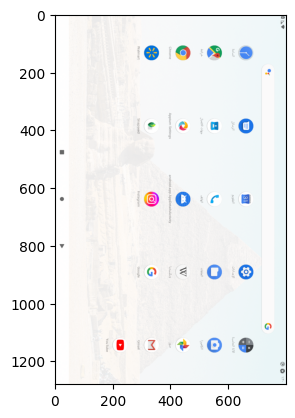

[{'numeric_tag': 0, 'resource_id': '', 'class': 'View', 'description': 'قائمةالتطبيقات'}, {'numeric_tag': 1, 'resource_id': 'id_scrim_view', 'class': 'View', 'description': ''}, {'numeric_tag': 2, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الآلةالحاسبة'}, {'numeric_tag': 3, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الإعدادات'}, {'numeric_tag': 4, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'التقويم'}, {'numeric_tag': 5, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الرسائل'}, {'numeric_tag': 6, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الساعة'}, {'numeric_tag': 7, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الكاميرا'}, {'numeric_tag': 8, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الملفات'}, {'numeric_tag': 9, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الهاتف'}, {'numeric_tag': 10, 'resource_id': 'id_icon', 'class': 'TextView', 'desc

In [9]:
# take action - swipe up
timestep = env.step(raw_action="""swipe("up")""",
                    elem_list=parsed_obs,
                    bbox_list=parsed_bbox)

# render image obs
img_obs = timestep.curr_obs['pixel']
plt.imshow(timestep.curr_obs['pixel'])
plt.show()

# parse text obs
raw_obs = timestep.curr_obs['text']
timestep.curr_obs['text'], parsed_obs, parsed_bbox = parse_obs(
    raw_obs,
    env._coordinator._screen_size,
    skip_non_leaf=False,
    attribute_check=False,
)
print(parsed_obs)

Thu Dec 31 13:30:00 KST 2015
Goal: create alarm at 10:30 am


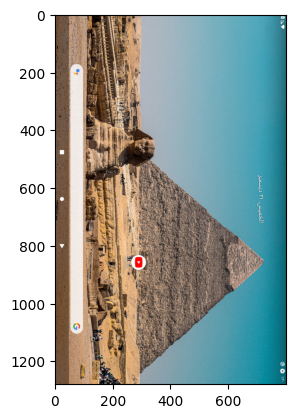

[{'numeric_tag': 0, 'resource_id': '', 'class': 'View', 'description': 'قائمةالتطبيقات'}, {'numeric_tag': 1, 'resource_id': 'id_scrim_view', 'class': 'View', 'description': ''}, {'numeric_tag': 2, 'resource_id': 'id_clock', 'class': 'TextView', 'description': 'الخميس،٣١ديسمبر'}, {'numeric_tag': 3, 'resource_id': 'id_smartspace_content', 'class': 'LinearLayout', 'description': ''}, {'numeric_tag': 4, 'resource_id': 'id_search_container_workspace', 'class': 'FrameLayout', 'description': ''}, {'numeric_tag': 5, 'resource_id': '', 'class': 'TextView', 'description': 'YouTube'}, {'numeric_tag': 6, 'resource_id': '', 'class': 'ViewGroup', 'description': ''}, {'numeric_tag': 7, 'resource_id': '', 'class': 'ViewGroup', 'description': ''}, {'numeric_tag': 8, 'resource_id': 'id_workspace', 'class': 'ScrollView', 'description': ''}, {'numeric_tag': 9, 'resource_id': 'id_page_indicator', 'class': 'View', 'description': ''}, {'numeric_tag': 10, 'resource_id': '', 'class': 'ViewGroup', 'description'

In [10]:
# take action - press home
timestep = env.step(raw_action="""press("HOME")""",
                    elem_list=parsed_obs,
                    bbox_list=parsed_bbox)

# render image obs
img_obs = timestep.curr_obs['pixel']
plt.imshow(timestep.curr_obs['pixel'])
plt.show()

# parse text obs
raw_obs = timestep.curr_obs['text']
timestep.curr_obs['text'], parsed_obs, parsed_bbox = parse_obs(
    raw_obs,
    env._coordinator._screen_size,
    skip_non_leaf=False,
    attribute_check=False,
)
print(parsed_obs)

Thu Dec 31 13:30:00 KST 2015
Goal: create alarm at 10:30 am


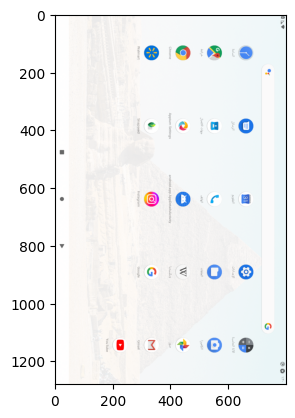

[{'numeric_tag': 0, 'resource_id': '', 'class': 'View', 'description': 'قائمةالتطبيقات'}, {'numeric_tag': 1, 'resource_id': 'id_scrim_view', 'class': 'View', 'description': ''}, {'numeric_tag': 2, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الآلةالحاسبة'}, {'numeric_tag': 3, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الإعدادات'}, {'numeric_tag': 4, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'التقويم'}, {'numeric_tag': 5, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الرسائل'}, {'numeric_tag': 6, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الساعة'}, {'numeric_tag': 7, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الكاميرا'}, {'numeric_tag': 8, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الملفات'}, {'numeric_tag': 9, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الهاتف'}, {'numeric_tag': 10, 'resource_id': 'id_icon', 'class': 'TextView', 'desc

In [11]:
# take action - swipe up
timestep = env.step(raw_action="""swipe("up")""",
                    elem_list=parsed_obs,
                    bbox_list=parsed_bbox)

# render image obs
img_obs = timestep.curr_obs['pixel']
plt.imshow(timestep.curr_obs['pixel'])
plt.show()

# parse text obs
raw_obs = timestep.curr_obs['text']
timestep.curr_obs['text'], parsed_obs, parsed_bbox = parse_obs(
    raw_obs,
    env._coordinator._screen_size,
    skip_non_leaf=False,
    attribute_check=False,
)
print(parsed_obs)

Thu Dec 31 13:30:00 KST 2015
Goal: create alarm at 10:30 am


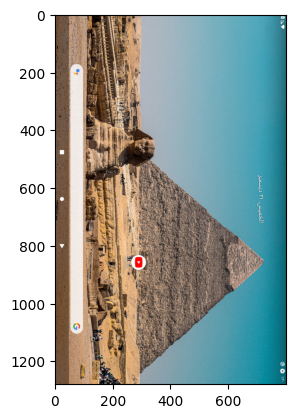

[{'numeric_tag': 0, 'resource_id': '', 'class': 'View', 'description': 'قائمةالتطبيقات'}, {'numeric_tag': 1, 'resource_id': 'id_scrim_view', 'class': 'View', 'description': ''}, {'numeric_tag': 2, 'resource_id': 'id_clock', 'class': 'TextView', 'description': 'الخميس،٣١ديسمبر'}, {'numeric_tag': 3, 'resource_id': 'id_smartspace_content', 'class': 'LinearLayout', 'description': ''}, {'numeric_tag': 4, 'resource_id': 'id_search_container_workspace', 'class': 'FrameLayout', 'description': ''}, {'numeric_tag': 5, 'resource_id': '', 'class': 'TextView', 'description': 'YouTube'}, {'numeric_tag': 6, 'resource_id': '', 'class': 'ViewGroup', 'description': ''}, {'numeric_tag': 7, 'resource_id': '', 'class': 'ViewGroup', 'description': ''}, {'numeric_tag': 8, 'resource_id': 'id_workspace', 'class': 'ScrollView', 'description': ''}, {'numeric_tag': 9, 'resource_id': 'id_page_indicator', 'class': 'View', 'description': ''}, {'numeric_tag': 10, 'resource_id': '', 'class': 'ViewGroup', 'description'

In [12]:
# take action - press home
timestep = env.step(raw_action="""press("BACK")""",
                    elem_list=parsed_obs,
                    bbox_list=parsed_bbox)

# render image obs
img_obs = timestep.curr_obs['pixel']
plt.imshow(timestep.curr_obs['pixel'])
plt.show()

# parse text obs
raw_obs = timestep.curr_obs['text']
timestep.curr_obs['text'], parsed_obs, parsed_bbox = parse_obs(
    raw_obs,
    env._coordinator._screen_size,
    skip_non_leaf=False,
    attribute_check=False,
)
print(parsed_obs)

Thu Dec 31 13:30:00 KST 2015
Goal: create alarm at 10:30 am


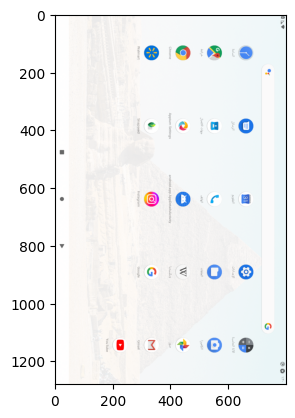

[{'numeric_tag': 0, 'resource_id': '', 'class': 'View', 'description': 'قائمةالتطبيقات'}, {'numeric_tag': 1, 'resource_id': 'id_scrim_view', 'class': 'View', 'description': ''}, {'numeric_tag': 2, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الآلةالحاسبة'}, {'numeric_tag': 3, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الإعدادات'}, {'numeric_tag': 4, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'التقويم'}, {'numeric_tag': 5, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الرسائل'}, {'numeric_tag': 6, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الساعة'}, {'numeric_tag': 7, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الكاميرا'}, {'numeric_tag': 8, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الملفات'}, {'numeric_tag': 9, 'resource_id': 'id_icon', 'class': 'TextView', 'description': 'الهاتف'}, {'numeric_tag': 10, 'resource_id': 'id_icon', 'class': 'TextView', 'desc

In [13]:
# take action - press home
timestep = env.step(raw_action="""swipe("up")""",
                    elem_list=parsed_obs,
                    bbox_list=parsed_bbox)

# render image obs
img_obs = timestep.curr_obs['pixel']
plt.imshow(timestep.curr_obs['pixel'])
plt.show()

# parse text obs
raw_obs = timestep.curr_obs['text']
timestep.curr_obs['text'], parsed_obs, parsed_bbox = parse_obs(
    raw_obs,
    env._coordinator._screen_size,
    skip_non_leaf=False,
    attribute_check=False,
)
print(parsed_obs)

Thu Dec 31 13:30:00 KST 2015
Goal: create alarm at 10:30 am


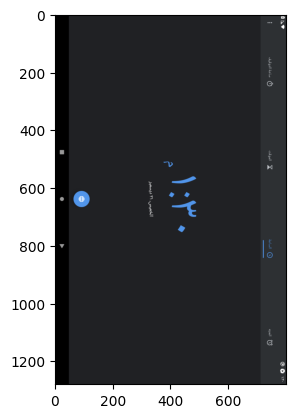

[{'numeric_tag': 0, 'resource_id': '', 'class': 'TextView', 'description': 'المنبّه'}, {'numeric_tag': 1, 'resource_id': '', 'class': 'xk', 'description': 'المنبّه'}, {'numeric_tag': 2, 'resource_id': '', 'class': 'TextView', 'description': 'الساعة'}, {'numeric_tag': 3, 'resource_id': '', 'class': 'xk', 'description': 'الساعة'}, {'numeric_tag': 4, 'resource_id': '', 'class': 'TextView', 'description': 'الموقت'}, {'numeric_tag': 5, 'resource_id': '', 'class': 'xk', 'description': 'الموقت'}, {'numeric_tag': 6, 'resource_id': '', 'class': 'TextView', 'description': 'ساعة_التوقيف'}, {'numeric_tag': 7, 'resource_id': '', 'class': 'xk', 'description': 'ساعةالتوقيف'}, {'numeric_tag': 8, 'resource_id': '', 'class': 'LinearLayout', 'description': ''}, {'numeric_tag': 9, 'resource_id': 'id_tabs', 'class': 'HorizontalScrollView', 'description': ''}, {'numeric_tag': 10, 'resource_id': '', 'class': 'ImageView', 'description': 'المزيدمنالخيارات'}, {'numeric_tag': 11, 'resource_id': '', 'class': 'aid

In [14]:
# take action - tap 6 (Clock)
timestep = env.step(raw_action="""tap(6)""",
                    elem_list=parsed_obs,
                    bbox_list=parsed_bbox)

# render image obs
img_obs = timestep.curr_obs['pixel']
plt.imshow(timestep.curr_obs["pixel"])
plt.show()

# parse text obs
raw_obs = timestep.curr_obs["text"]
timestep.curr_obs["text"], parsed_obs, parsed_bbox = parse_obs(
    raw_obs,
    env._coordinator._screen_size,
    skip_non_leaf=False,
    attribute_check=False,
)
print(parsed_obs)

Thu Dec 31 13:30:00 KST 2015
Goal: create alarm at 10:30 am


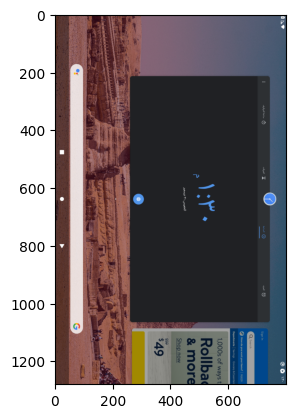

[{'numeric_tag': 0, 'resource_id': '', 'class': 'View', 'description': 'قائمةالتطبيقات'}, {'numeric_tag': 1, 'resource_id': 'id_scrim_view', 'class': 'View', 'description': ''}, {'numeric_tag': 2, 'resource_id': 'id_snapshot', 'class': 'View', 'description': ''}, {'numeric_tag': 3, 'resource_id': '', 'class': 'FrameLayout', 'description': 'Walmart'}, {'numeric_tag': 4, 'resource_id': 'id_snapshot', 'class': 'View', 'description': ''}, {'numeric_tag': 5, 'resource_id': 'id_icon', 'class': 'View', 'description': ''}, {'numeric_tag': 6, 'resource_id': '', 'class': 'FrameLayout', 'description': 'الساعة'}, {'numeric_tag': 7, 'resource_id': 'id_overview_panel', 'class': 'ListView', 'description': ''}, {'numeric_tag': 8, 'resource_id': 'id_page_indicator', 'class': 'View', 'description': ''}, {'numeric_tag': 9, 'resource_id': '', 'class': 'ViewGroup', 'description': ''}, {'numeric_tag': 10, 'resource_id': 'id_hotseat', 'class': 'ViewGroup', 'description': ''}, {'numeric_tag': 11, 'resource_id

In [16]:
# take action - press overview
timestep = env.step(raw_action="""press("OVERVIEW")""",
                    elem_list=parsed_obs,
                    bbox_list=parsed_bbox)

# render image obs
img_obs = timestep.curr_obs['pixel']
plt.imshow(timestep.curr_obs['pixel'])
plt.show()

# parse text obs
raw_obs = timestep.curr_obs['text']
timestep.curr_obs['text'], parsed_obs, parsed_bbox = parse_obs(
    raw_obs,
    env._coordinator._screen_size,
    skip_non_leaf=False,
    attribute_check=False,
)
print(parsed_obs)

Thu Dec 31 13:30:00 KST 2015
Goal: create alarm at 10:30 am


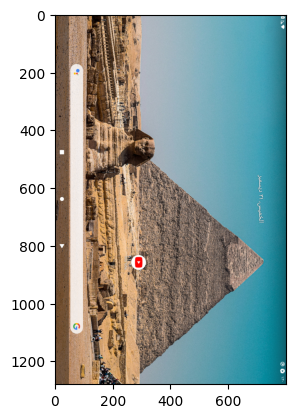

[{'numeric_tag': 0, 'resource_id': '', 'class': 'View', 'description': 'قائمةالتطبيقات'}, {'numeric_tag': 1, 'resource_id': 'id_scrim_view', 'class': 'View', 'description': ''}, {'numeric_tag': 2, 'resource_id': 'id_clock', 'class': 'TextView', 'description': 'الخميس،٣١ديسمبر'}, {'numeric_tag': 3, 'resource_id': 'id_smartspace_content', 'class': 'LinearLayout', 'description': ''}, {'numeric_tag': 4, 'resource_id': 'id_search_container_workspace', 'class': 'FrameLayout', 'description': ''}, {'numeric_tag': 5, 'resource_id': '', 'class': 'TextView', 'description': 'YouTube'}, {'numeric_tag': 6, 'resource_id': '', 'class': 'ViewGroup', 'description': ''}, {'numeric_tag': 7, 'resource_id': '', 'class': 'ViewGroup', 'description': ''}, {'numeric_tag': 8, 'resource_id': 'id_workspace', 'class': 'ScrollView', 'description': ''}, {'numeric_tag': 9, 'resource_id': 'id_page_indicator', 'class': 'View', 'description': ''}, {'numeric_tag': 10, 'resource_id': '', 'class': 'ViewGroup', 'description'

In [17]:
# take action - press home
timestep = env.step(raw_action="""press("HOME")""",
                    elem_list=parsed_obs,
                    bbox_list=parsed_bbox)

# render image obs
img_obs = timestep.curr_obs['pixel']
plt.imshow(timestep.curr_obs['pixel'])
plt.show()

# parse text obs
raw_obs = timestep.curr_obs['text']
timestep.curr_obs['text'], parsed_obs, parsed_bbox = parse_obs(
    raw_obs,
    env._coordinator._screen_size,
    skip_non_leaf=False,
    attribute_check=False,
)
print(parsed_obs)

# Clean Up

In [18]:
env.close()